Plotting Data for a better understanding of our business modell and the efficiency of optimising bus traffic in rural areas

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json 

In [3]:
%matplotlib inline

In [73]:
# Open JSON File
cdj = open("customer_results.json")
customer_data = json.load(cdj)

In [33]:
customer_data

[{'destination': 'stop_d',
  'enter_bus': '12:50:56',
  'leave_bus': '13:11:56',
  'name': 'customer0',
  'signal_time': '12:21:56',
  'starting_point': 'stop_e',
  'starting_time': '12:48:56'},
 {'destination': 'stop_e',
  'enter_bus': '13:08:50',
  'leave_bus': '13:43:50',
  'name': 'customer1',
  'signal_time': '12:04:50',
  'starting_point': 'stop_c',
  'starting_time': '12:58:50'},
 {'destination': 'stop_c',
  'enter_bus': '06:37:08',
  'leave_bus': '06:48:08',
  'name': 'customer2',
  'signal_time': '06:13:08',
  'starting_point': 'stop_e',
  'starting_time': '06:32:08'},
 {'destination': 'stop_c',
  'enter_bus': '17:50:51',
  'leave_bus': '18:14:51',
  'name': 'customer3',
  'signal_time': '17:06:51',
  'starting_point': 'stop_a',
  'starting_time': '17:45:51'},
 {'destination': 'stop_b',
  'enter_bus': '15:49:06',
  'leave_bus': '16:14:06',
  'name': 'customer4',
  'signal_time': '15:12:06',
  'starting_point': 'stop_e',
  'starting_time': '15:35:06'}]

In [39]:
type(customer_data[2])

dict

In [74]:
old_data = {'Name' : [customer_data[0]['name'], customer_data[1]['name'], customer_data[2]['name'], 
                  customer_data[3]['name'], customer_data[4]['name']],
        'Start' : [customer_data[0]['starting_point'], customer_data[1]['starting_point'], customer_data[2]['starting_point'], 
                  customer_data[3]['starting_point'], customer_data[4]['starting_point']],
        'End' : [customer_data[0]['destination'], customer_data[1]['destination'], customer_data[2]['destination'], 
                  customer_data[3]['destination'], customer_data[4]['destination']],
        'Start Time' : [customer_data[0]['starting_time'], customer_data[1]['starting_time'], customer_data[2]['starting_time'], 
                  customer_data[3]['starting_time'], customer_data[4]['starting_time']],
        'Signal' : [customer_data[0]['signal_time'], customer_data[1]['signal_time'], customer_data[2]['signal_time'], 
                  customer_data[3]['signal_time'], customer_data[4]['signal_time']],
        'Enter' : [customer_data[0]['enter_bus'], customer_data[1]['enter_bus'], customer_data[2]['enter_bus'], 
                  customer_data[3]['enter_bus'], customer_data[4]['enter_bus']],
        'Leave' : [customer_data[0]['leave_bus'], customer_data[1]['leave_bus'], customer_data[2]['leave_bus'], 
                  customer_data[3]['leave_bus'], customer_data[4]['leave_bus']]    }

In [78]:
# ! Uhrzeiten in Kommazahlen umwandeln
data = {'Name' : [customer_data[0]['name'], customer_data[1]['name'], customer_data[2]['name'], 
                  customer_data[3]['name'], customer_data[4]['name']],
        'Start' : [customer_data[0]['starting_point'], customer_data[1]['starting_point'], customer_data[2]['starting_point'], 
                  customer_data[3]['starting_point'], customer_data[4]['starting_point']],
        'End' : [customer_data[0]['destination'], customer_data[1]['destination'], customer_data[2]['destination'], 
                  customer_data[3]['destination'], customer_data[4]['destination']],
        'Start Time' : [12.48, 12.58, 6.32, 
                  17.45, 15.35],
        'Signal' : [12.21, 12.04, 6.13, 
                  17.06, 15.12],
        'Enter' : [12.50, 13.08, 6.37, 
                  17.50, 15.49],
        'Leave' : [13.11, 13.43, 6.48, 
                  18.14, 16.14]    }

In [79]:
# Create a DataFrame
df = pd.DataFrame(data)
df

,Name,Start,End,Start Time,Signal,Enter,Leave
0,customer0,stop_e,stop_d,12.48,12.21,12.50,13.11
1,customer1,stop_c,stop_e,12.58,12.04,13.08,13.43
2,customer2,stop_e,stop_c,6.32,6.13,6.37,6.48
3,customer3,stop_a,stop_c,17.45,17.06,17.50,18.14
4,customer4,stop_e,stop_b,15.35,15.12,15.49,16.14


In [58]:
# Create a second Data Set including the gaps of the time points
data2 = {'Name' : [customer_data[0]['name'], customer_data[1]['name'], customer_data[2]['name'], 
                  customer_data[3]['name'], customer_data[4]['name']],
        'Start' : [customer_data[0]['starting_point'], customer_data[1]['starting_point'], customer_data[2]['starting_point'], 
                  customer_data[3]['starting_point'], customer_data[4]['starting_point']],
        'End' : [customer_data[0]['destination'], customer_data[1]['destination'], customer_data[2]['destination'], 
                  customer_data[3]['destination'], customer_data[4]['destination']],
        'SiS Gap' : [27, 54, 19, 39, 23],
        'EL Gap' : [21, 35, 11, 24, 25],
        'SE Gap' : [2, 10, 5, 5, 14],
        'SL Gap' : [23, 45, 16, 29, 39]    }

In [59]:
# Create another DataFrame
df2 = pd.DataFrame(data2)
df2

,Name,Start,End,SiS Gap,EL Gap,SE Gap,SL Gap
0,customer0,stop_e,stop_d,27,21,2,23
1,customer1,stop_c,stop_e,54,35,10,45
2,customer2,stop_e,stop_c,19,11,5,16
3,customer3,stop_a,stop_c,39,24,5,29
4,customer4,stop_e,stop_b,23,25,14,39


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


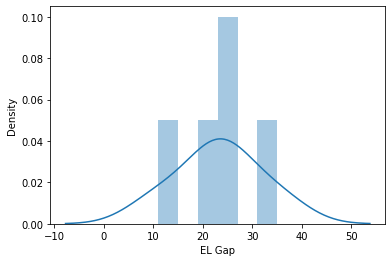

In [60]:
sns.distplot(df2['EL Gap'])

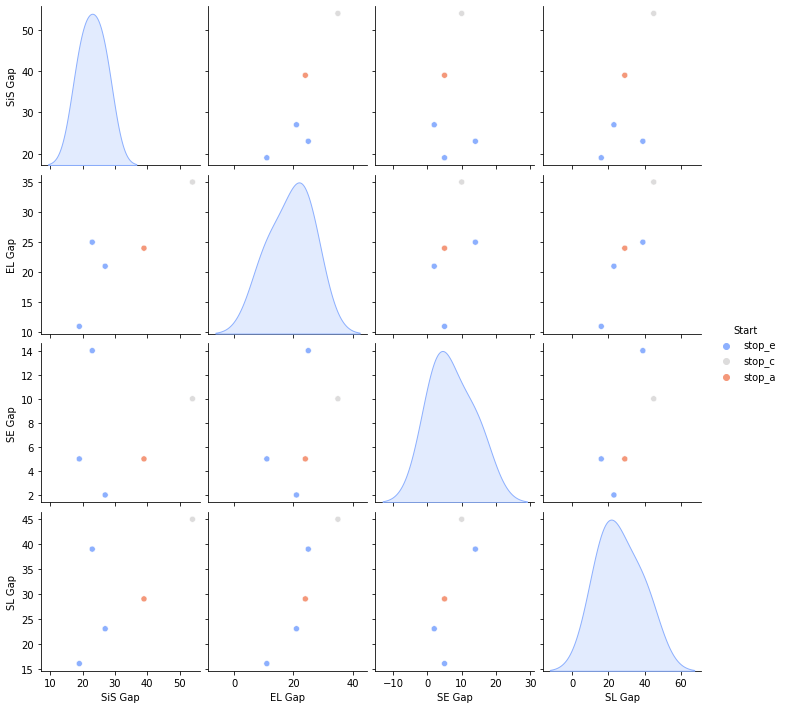

In [62]:
sns.pairplot(df2, hue = 'Start', palette = 'coolwarm')

In [64]:
# find average numbers for 
# Start and Enter 
average_SE = sum(df2['SE Gap']) / len(df2['SE Gap'])
average_SE

7.2

In [66]:
# find average numbers for 
# Signal and Start 
average_SiS = sum(df2['SiS Gap']) / len(df2['SiS Gap'])
average_SiS

32.4

In [67]:
# find average numbers for 
# Enter and Leave
average_EL = sum(df2['EL Gap']) / len(df2['EL Gap'])
average_EL

23.2

In [68]:
# find average numbers for 
# Start and Leave
average_SL = sum(df2['SL Gap']) / len(df2['SL Gap'])
average_SL

30.4

In [69]:
# create a set of the average numbers 
avg_set = [average_SE, average_SiS, average_EL, average_SL]

In [70]:
df3 = pd.DataFrame(avg_set)
df3

,0
0,7.2
1,32.4
2,23.2
3,30.4


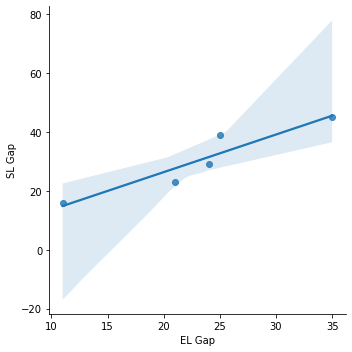

In [63]:
sns.lmplot(x='EL Gap', y = 'SL Gap', data = df2)

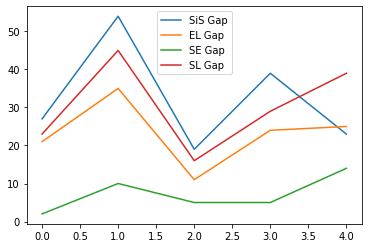

In [71]:
df2.plot()

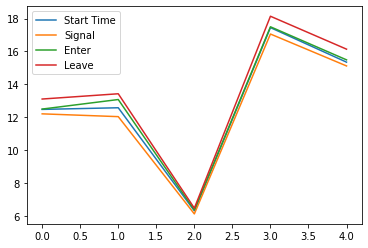

In [80]:
df.plot()

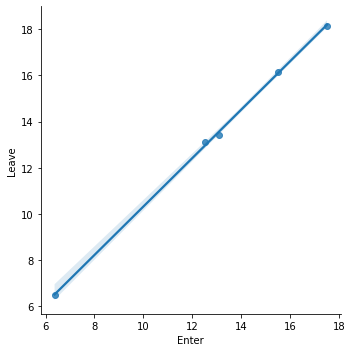

In [81]:
sns.lmplot(x='Enter', y = 'Leave', data = df)

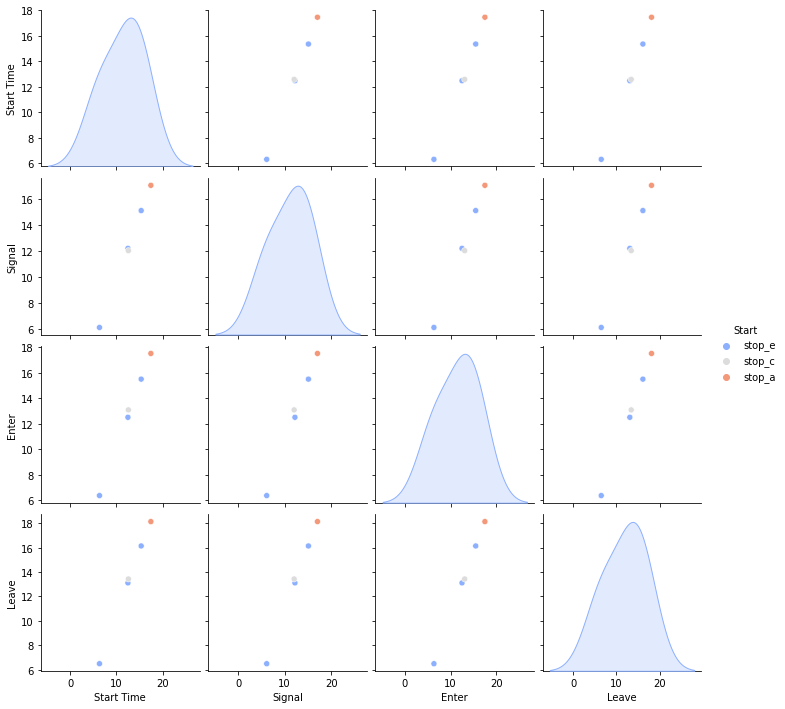

In [86]:
sns.pairplot(df, hue = 'Start', palette = 'coolwarm')

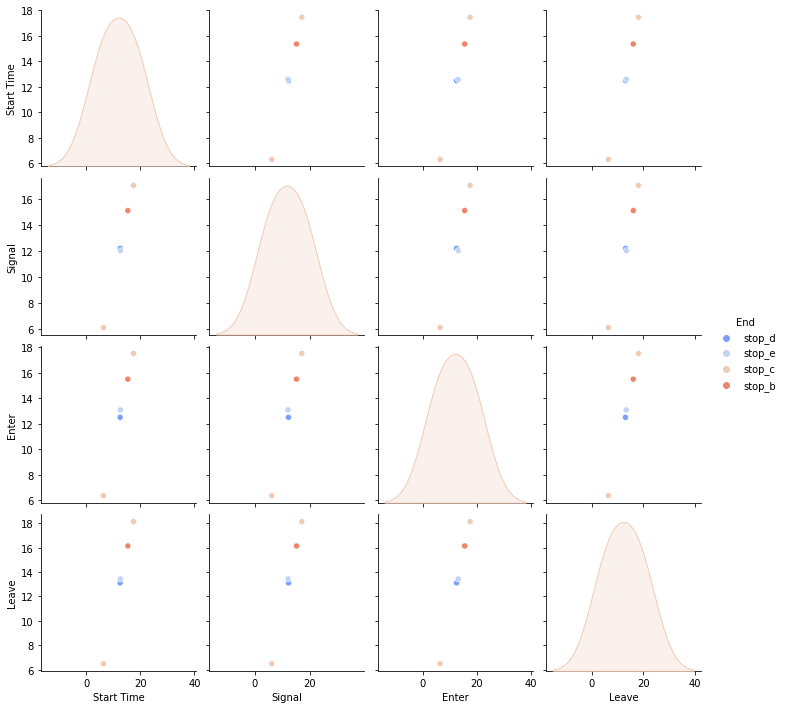

In [88]:
sns.pairplot(df, hue = 'End', palette = 'coolwarm')